## Regularization demo

In [1]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import numpy as np
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as npla
%matplotlib inline
%autosave 0

Autosave disabled


In [2]:
matplotlib.rcParams.update({'font.size': 15})

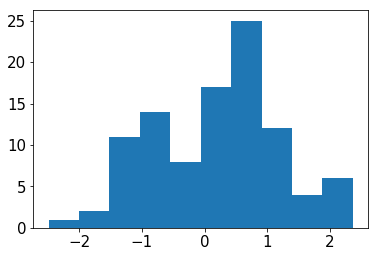

In [3]:
N = 100
y = npr.randn(N,1)
plt.hist(y);

- Imagine your training set only contains the $y$-values, and they are shown above.
- How can you predict a new $y$?
- Reasonable idea: predict the mean value.

In [4]:
class MeanPredictor():
    def fit(self,y):
        self.mean = np.mean(y)
    def predict(self):
        return self.mean
mp = MeanPredictor()
mp.fit(y)
mp.predict()

0.19125472658855483

Now imagine we have one feature $x$. 

In [5]:
x = y/2+npr.randn(N,1)/3

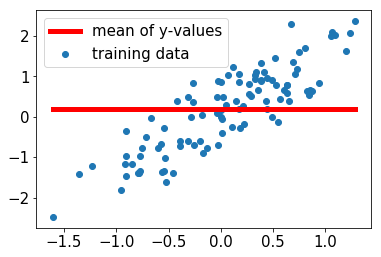

In [6]:
plt.scatter(x,y,label="training data")
mean = np.mean(y)
plt.plot((min(x),max(x)),(mean,mean), linewidth=5, c="red",label="mean of y-values");
plt.legend();

- So, what we were doing was sort of like linear regression with $w=0$.
- Ok, but, why not use this feature?

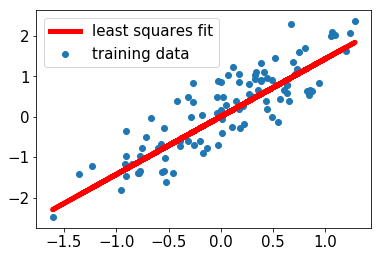

In [7]:
plt.scatter(x,y,label="training data")
w = np.sum(x*y)/np.sum(x*x)
plt.plot(x,w*x, linewidth=5, c="red",label="least squares fit");
plt.legend();

- But what if we don't trust this feature that much?
- Let's take a compromise between our prior model (mean value) and our new model.
- _We can achieve this by penalizing large values of $w$_.
- The loss becomes

$$\sum_{i=1}^n (wx_i-y_i)^2 + \lambda w^2$$

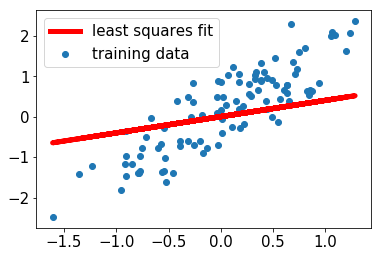

In [8]:
plt.scatter(x,y,label="training data")
w = np.sum(x*y)/(np.sum(x*x)+100)
plt.plot(x,w*x, linewidth=5, c="red",label="least squares fit");
plt.legend();

- Makes sense in light of the intuition: more features makes linear regression overfit.
- This is an alternative to the hard decisions of feature selection.

## Regularization demo

### Generate some synthetic data in 1-d

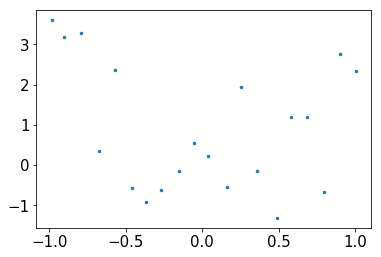

In [9]:
N = 20
X = np.linspace(-1,1,N)+npr.randn(N)*0.01
X=X[:,None]
y = npr.randn(N,1) + 3*X**2

plt.plot(X,y,'.',markersize=5);

### Fit (interpolate) with degree $N-1$ polynomial

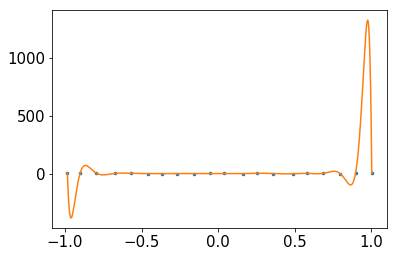

In [10]:
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X)
v = npla.solve(Z.T @ Z, Z.T @ y)
grid = np.linspace(min(X),max(X),1000)[:,None]
grid_poly = pf.fit_transform(grid)

plt.plot(X,y,'.',markersize=5)
plt.plot(grid, grid_poly@v);

In [11]:
print(v)
print(max(abs(v)))

[[ 6.15083180e-01]
 [-5.88675103e+00]
 [-1.26668135e+02]
 [ 8.76181812e+01]
 [ 5.00195618e+03]
 [ 7.08607976e+03]
 [-7.13191106e+04]
 [-1.49930758e+05]
 [ 4.82330574e+05]
 [ 1.19253196e+06]
 [-1.76878298e+06]
 [-4.88102614e+06]
 [ 3.71747046e+06]
 [ 1.12181569e+07]
 [-4.46297832e+06]
 [-1.45533316e+07]
 [ 2.83581194e+06]
 [ 9.91112044e+06]
 [-7.36674762e+05]
 [-2.74505594e+06]]
[14553331.58526684]


Problem: this results are crazy (overfitting). Interpretation: many large weights are cancelling each other out at the data points.

### Solution 1: lower degree polynomial

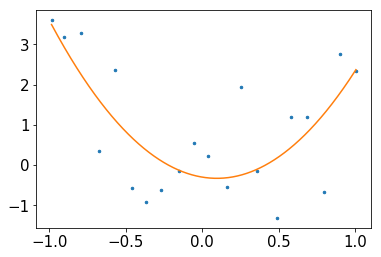

In [12]:
pf = PolynomialFeatures(2)
Z = pf.fit_transform(X)

v = npla.solve(Z.T @ Z, Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@v);

In [13]:
print(v)
print(max(abs(v)))

[[-0.29813975]
 [-0.62579687]
 [ 3.27424124]]
[3.27424124]


Discussion:
- The lower degree polynomial looks good. 
- But if the true relationship really was complicated? Then if we restricted the degree of the polynomial, we'd miss out on it. 

### Solution 2: add L2-regularization

- Let's let the data decide how complex our model needs to be. 
- This is just like the complexity penalty from before, but now we can still optimize the loss easily.

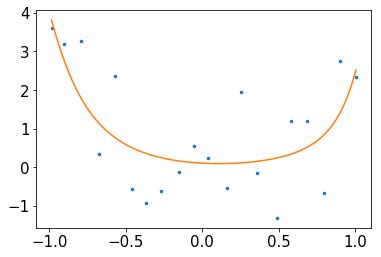

In [14]:
pf = PolynomialFeatures(19)
Z = pf.fit_transform(X)

λ = 1
v = npla.solve(Z.T @ Z + λ*np.eye(Z.shape[1]), Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@v);

In [15]:
Z.shape

(20, 20)

In [16]:
print(v)
print(max(abs(v)))

[[ 0.10451476]
 [-0.2057747 ]
 [ 1.00782307]
 [-0.46641837]
 [ 0.84644218]
 [-0.24564366]
 [ 0.5948948 ]
 [-0.091552  ]
 [ 0.39669711]
 [-0.00475721]
 [ 0.24698604]
 [ 0.03870547]
 [ 0.13135392]
 [ 0.05535887]
 [ 0.04028185]
 [ 0.05596017]
 [-0.03215794]
 [ 0.04749371]
 [-0.0899778 ]
 [ 0.03440057]]
[1.00782307]


Discussion:
- Regularization helped! Even though we used a degree $N-1$ polynomial, we didn't end up with a crazy model.
- We can add regularization to many models, not just least squares with a polynomial basis.

#### More regularization thoughts (to read after class):

Imagine minimizing $f(w)=(w-1)^2+\lambda w^2$ with respect to $w$. The left-hand term wants to set $w=1$ to be minimized (equal to zero, in this case, since something squared can't be negative). The right-hand term wants to set $w=0$ to be minimized (again, equal to zero). What if we set $w=0$? Then we get a penalty of $1$ from the left-hand term and a penalty of zero from the right-hand term, for a total of $f(0)=1$. Now what if we set $w=1$? Then the left-hand term gives a penalty of zero and the right-hand term equals $\lambda$, so $f(1)=\lambda$. Then if $\lambda=1$ these two solutions are equally desirable, but if $\lambda=100$ then it becomes much better to set $w=0$ than $w=1$ and on the other hand if $\lambda=0.01$ then the opposite is true. So as you can see $\lambda$ controls the relative strength or "importance" of the two terms in our objective function.
 
In this particular case, because I picked such a simple example, we could also do the math by hand:
 
$$f(w)=(w-1)^2+\lambda w^2=(\lambda+1)w^2-2w+1$$
 
Setting the derivative to zero:
 
$$2(\lambda+1)w-2=0$$
 
yields
 
$$w=\frac{1}{1+\lambda}$$
 
So now we see it very clearly: if $\lambda=1$ then the solution lies at $0.5$ which is sensible, since the two terms are weighted equally. But as $\lambda$ grows the solution moves towards $w=0$, and as $\lambda$ shrinks towards zero the solutions goes towards $w=1$. 
 
All this is fairly analogous to linear regression situation except that

- $w$ is $d$-dimensional instead of $1$-dimensional
- the minimizer of the left-hand side is the $w$ that minimizes training error
 
So $\lambda$ controls the relative importance of training error vs. regularization.